## Know I Want To Training about my ability 
and i want use data set csv program

In [18]:
# import pakages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Load And Generate Data Set

In [19]:
df=pd.read_csv('crude-oil-price.csv')
df.fillna(0,axis=0,inplace=True)
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,0.000000,0.00
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  469 non-null    float64
 3   change         469 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


In [21]:
df.shape
# the ouput is index and columns

(469, 4)

# So I want to linear regestion this data
chage data from is indepedent
price is dependent

In [22]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [23]:
df.columns

Index(['date', 'price', 'percentChange', 'change'], dtype='object')

In [24]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [26]:
modeling=sm.OLS(df.change,df.price).fit()
modeling.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              4.069
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                      0.0443
Time:                        22:26:54   Log-Likelihood:                         -1413.3
No. Observations:                 469   AIC:                                      2829.
Df Residuals:                     468   BIC:                                      2833.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.0088      0.004      2.017      0.044       0.000       0.017
==============================================================================
Omnibus:                      145.328   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.054
Skew:                          -1.151   Prob(JB):                    2.09e-219
Kurtosis:                       9.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# print out params and t values
print('result params from price and change'.center(50,'-'))
print(modeling.params)# ini adalah coefience 
print('t value price and change'.center(30,'-'))
print(modeling.tvalues)
print('standard error is'.center(30,'-'))
print(modeling.bse)

-------result params from price and change--------
price    0.008765
dtype: float64
---t value price and change---
price    2.017114
dtype: float64
------standard error is-------
price    0.004345
dtype: float64


In [28]:
print(modeling.t_test(1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0088      0.004      2.017      0.044       0.000       0.017


In [29]:
modeling.pvalues

price    0.044254
dtype: float64

In [30]:
# prove with eject or acivate h0
# refence https://www.statology.org/statsmodels-linear-regression-p-value/

if modeling.pvalues[0]<0.05:
    print('tolak ho')
    print('datanya masih bisa di prediksi')
else:
    print('gagal total h0')
    print('datanya gitu aja')


tolak ho
datanya masih bisa di prediksi


How To plot this predict with this dataset


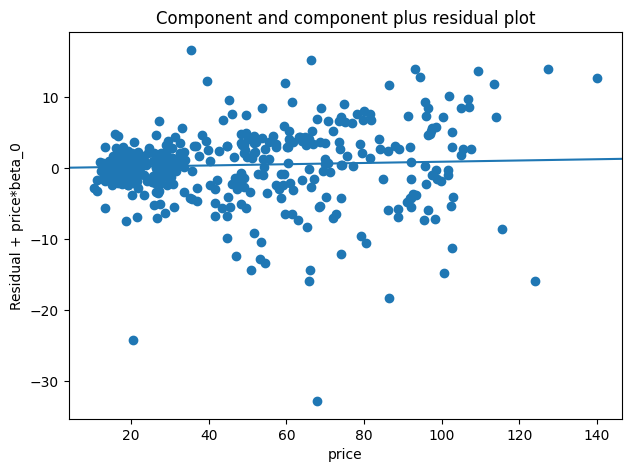

In [32]:
fig=sm.graphics.plot_ccpr(modeling,'price')
fig.tight_layout(pad=float(1))

<AxesSubplot: xlabel='price', ylabel='change'>

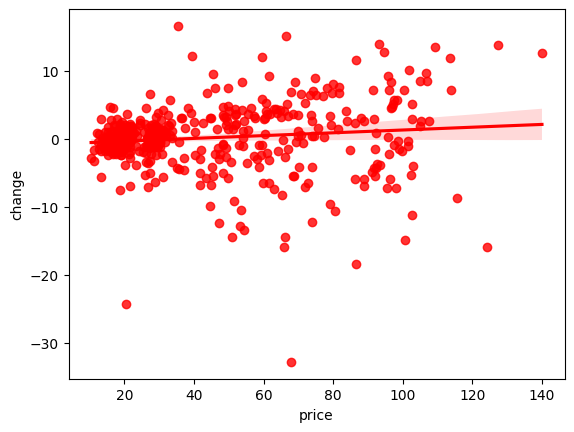

In [35]:
import seaborn as sns
# refence https://towardsdatascience.com/five-regression-python-modules-that-every-data-scientist-must-know-a4e03a886853
sns.regplot(x=df.price,y=df.change,ci=95,color='r')